In [1]:
import numpy as np
import math
import csv
from proj1_helpers import *
from Hadrien import *
from ML_methods import *
from features_engineering import *
from correlation import *
import matplotlib.pyplot as plt


%load_ext autoreload
%autoreload 2

### load Data

In [224]:
y, tx, ids = load_csv_data("data_csv/train.csv", sub_sample=True)
print("y has shape {0}".format(y.shape))
print("X has shape {0}".format(tx.shape))

y has shape (5000,)
X has shape (5000, 30)


-> we can observe some (3 at all) different patterns of NAN values -> essayer de déterminer si ces values ont une corrélation avec le label:
- pattern 1: feature 0: 840 NAN -> 16.8% NAN
- pattern 2: features 23,24,25: 1985 NAN -> 39.7% NAN
- pattern 3: features 4,5,6,12,26,27,28: 3525 NAN -> 70.5 % NAN


Also :
- 562 samples de p1 font parti de p2.
- 734 samples de p1 font parti de p3.
- 0 samples de p2 font parti de p1.
- 1423 sample de p2 font parti de p3
- 0 samples de p3 font parti de p1.
- 0 samples de p3 font parti de p2.

Also:
- p2 inter p3 = 1985
- p1 union p3 union p2 = 3631

In [225]:
tx_nan = transform_to_nan(tx, -900)

In [226]:
from NAN_Pattern_Decomposition import decompose_dataset_according_to_NAN_pattern

p0, y0, p1, y1, p2, y2, p3, y3 = decompose_dataset_according_to_NAN_pattern(tx_nan, y)

# Feature Engineering

In [227]:
def process_features_p0(tx):
    
    tx_nan_mean, mean = transform_to_mean(tx)
    
    features_square = [6]
    tx_square = transform_feature_power(tx_nan_mean, features_square, 2)

    features_log = [0, 2, 3, 5, 6, 8, 9, 10, 13, 16, 19, 21, 23, 26, 29]
    tx_log = transform_feature_log(tx_square, features_log)

    features_sin = [11, 12, 14, 15, 17]
    tx_angle_stand = standardize_angles(tx_log, features_sin)
    tx_sin = transform_feature_sin(tx_angle_stand, features_sin)

    feature_std = features_log
    tx_std, mean, std = standardize_features(tx_sin, feature_std)

    tx_22plus0 = new_feature_PRI_jet_num(tx_std, 0.0)
    tx_22plus1 = new_feature_PRI_jet_num(tx_22plus0, 1.0)
    tx_22plus2 = new_feature_PRI_jet_num(tx_22plus1, 2.0)
    tx_22plus3 = new_feature_PRI_jet_num(tx_22plus2, 3.0)
    
    return tx_22plus3

## Pattern 0 (No NAN values)

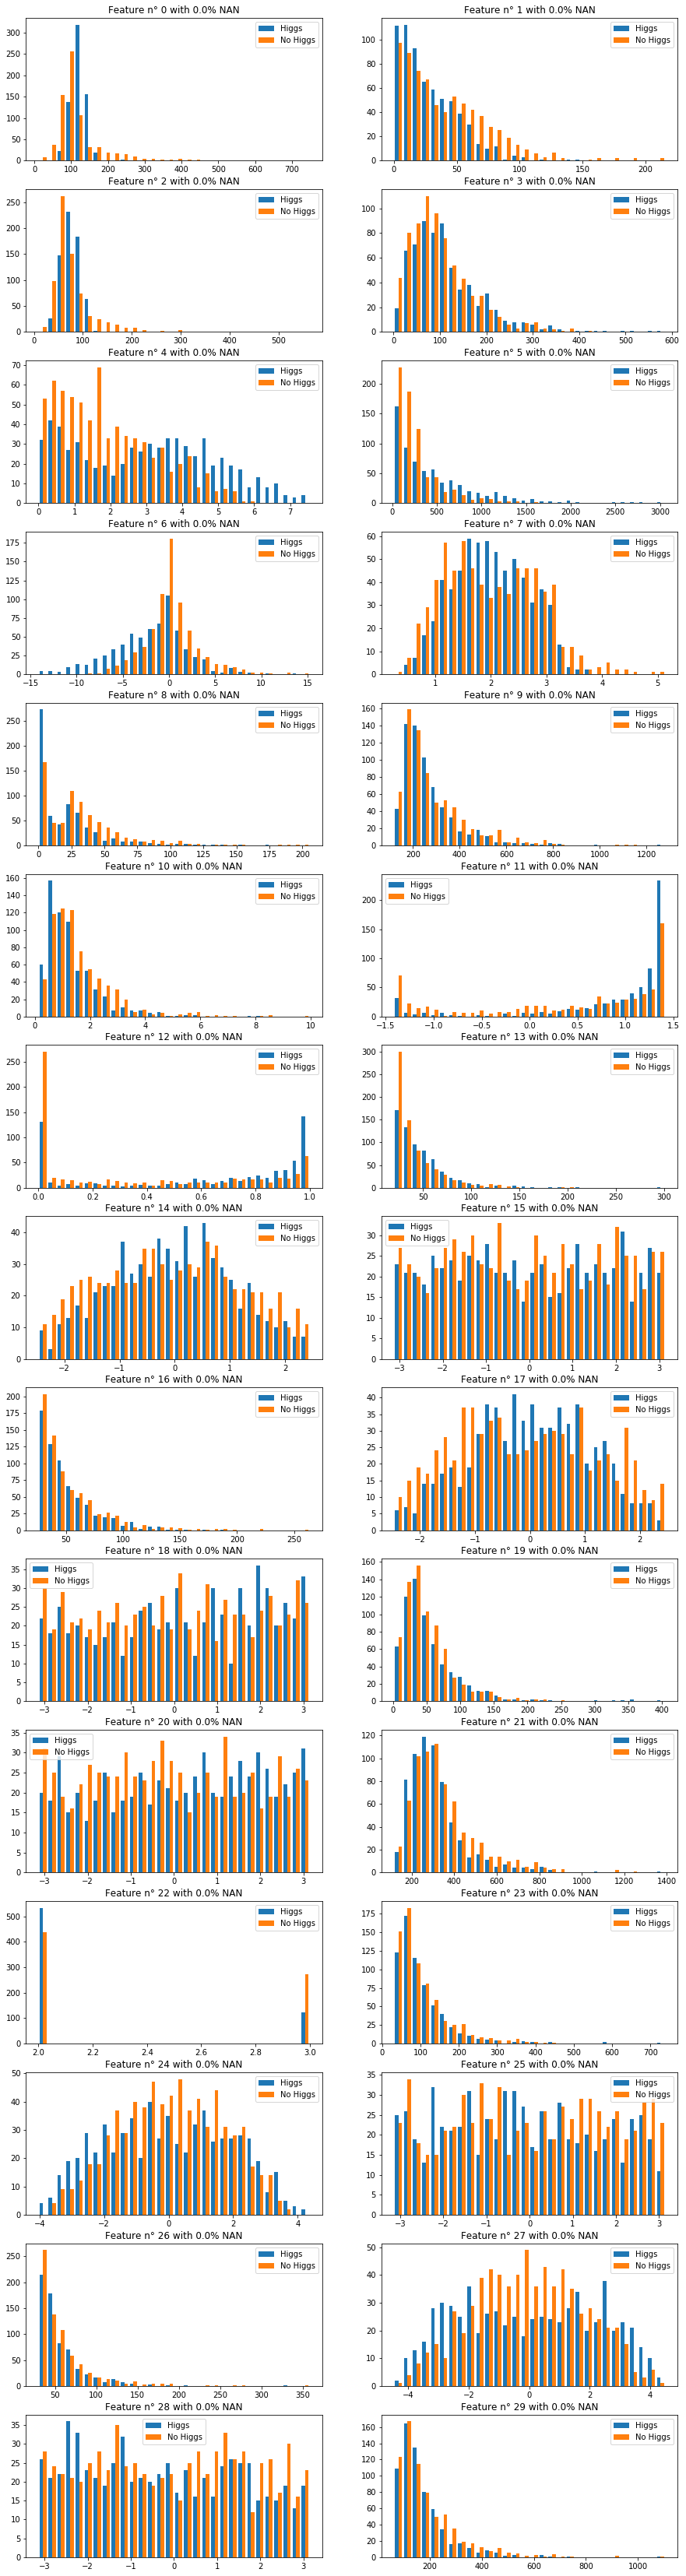

In [228]:
display_feature_distribution(y0, p0, 30)

In [229]:
p0_processed = process_features_p0(p0)
p0_processed.shape

(1369, 34)

## Pattern 1 (Feature 0)

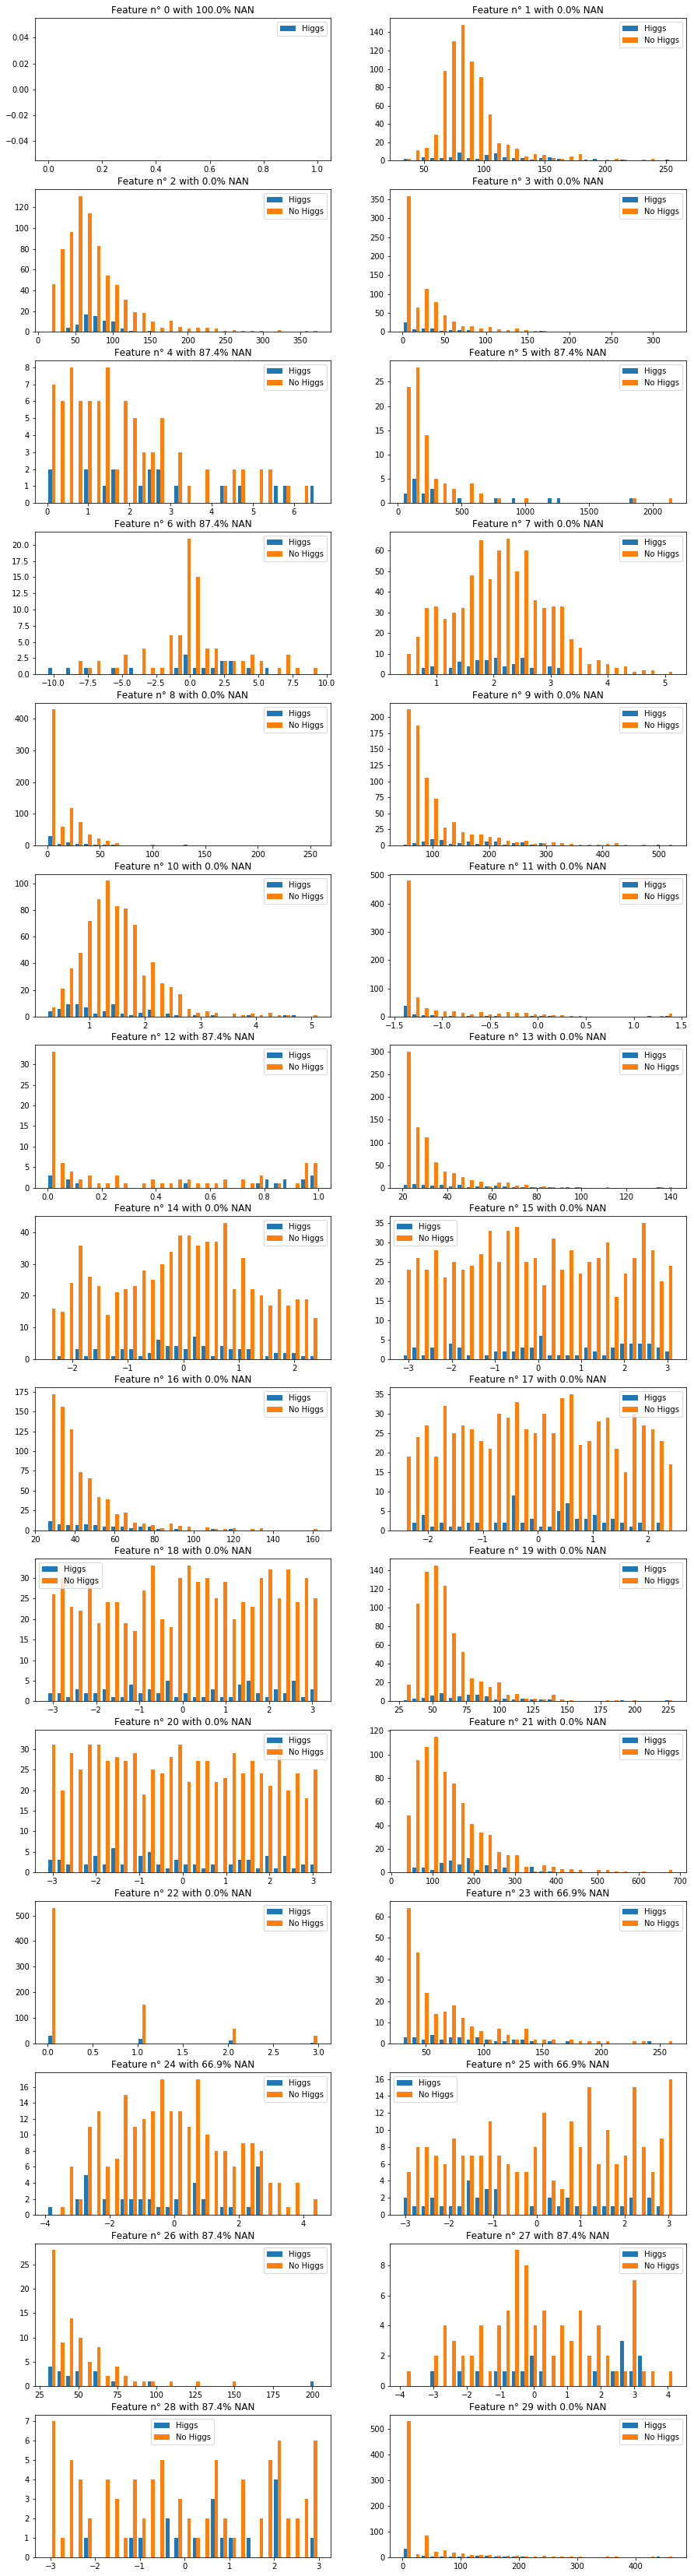

In [230]:
display_feature_distribution(y1, p1, 30)

In [231]:
p1_processed = process_features_p0(p1)
p1_processed.shape

/home/hadrien/ML/local/projects/project1/ML_methods.py:98: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(t, axis = 0)
/home/hadrien/ML/local/projects/project1/ML_methods.py:101: RuntimeWarning: Mean of empty slice
  column[np.isnan(column)] = np.nanmean(column)
/home/hadrien/ML/local/projects/project1/features_engineering.py:100: RuntimeWarning: All-NaN slice encountered
  feature = tx[:,i] - np.nanmin(tx[:,i]) + 0.1 #pour enlever les valeurs négatives
/home/hadrien/anaconda3/lib/python3.6/site-packages/numpy/lib/nanfunctions.py:1434: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)
/home/hadrien/ML/local/projects/project1/features_engineering.py:87: RuntimeWarning: Mean of empty slice
  mean.append(np.nanmean(standfeature))


(840, 34)

## Pattern 2 (Feature 23)

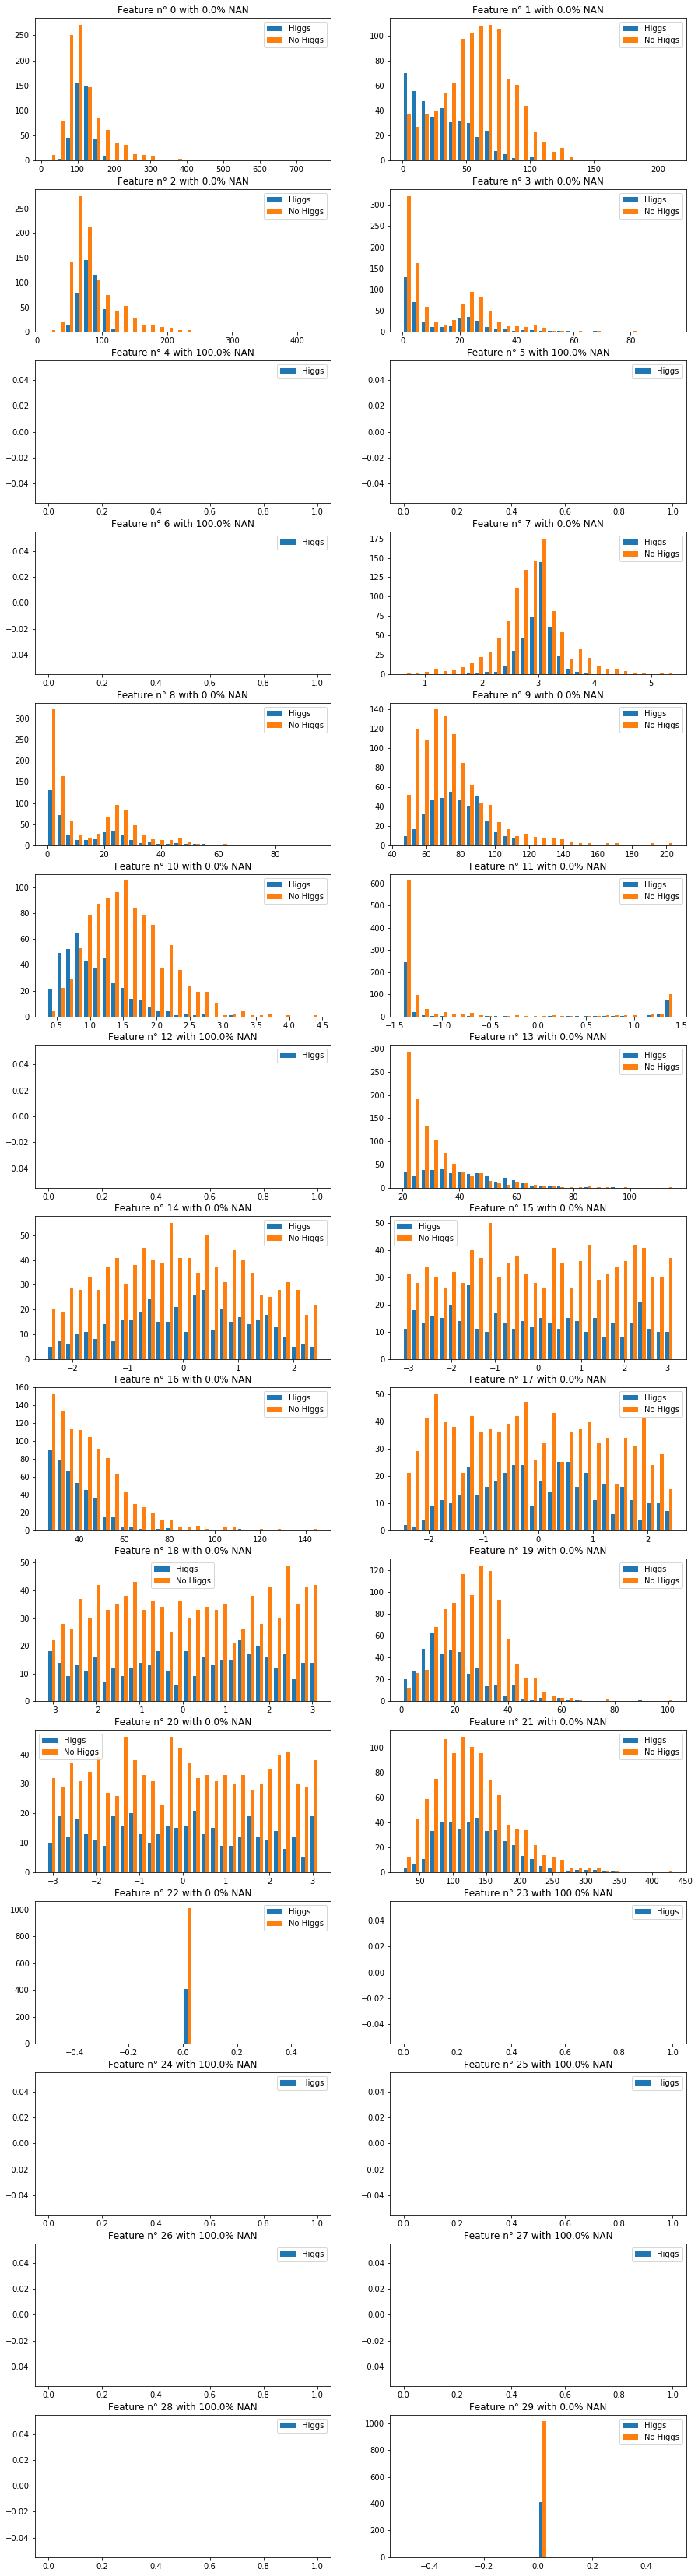

In [232]:
display_feature_distribution(y2, p2, 30)

In [252]:
p2_processed = process_features_p0(p2)
p2_processed.shape

/home/hadrien/ML/local/projects/project1/ML_methods.py:98: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(t, axis = 0)
/home/hadrien/ML/local/projects/project1/ML_methods.py:101: RuntimeWarning: Mean of empty slice
  column[np.isnan(column)] = np.nanmean(column)
/home/hadrien/ML/local/projects/project1/features_engineering.py:100: RuntimeWarning: All-NaN slice encountered
  feature = tx[:,i] - np.nanmin(tx[:,i]) + 0.1 #pour enlever les valeurs négatives
/home/hadrien/ML/local/projects/project1/features_engineering.py:54: RuntimeWarning: All-NaN slice encountered
  standfeature = (standfeature - np.nanmin(standfeature) - np.pi)/ (np.nanmax(standfeature) - np.nanmin(standfeature)) * 2 * np.pi
/home/hadrien/anaconda3/lib/python3.6/site-packages/numpy/lib/nanfunctions.py:1434: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)
/home/hadrien/ML/local/projects/project1/features_engineering.py:87: RuntimeWarning: Mean of empty slice
  mean.append(np.nanmean(stand

(1423, 34)

## Pattern 3 (Feature 28)

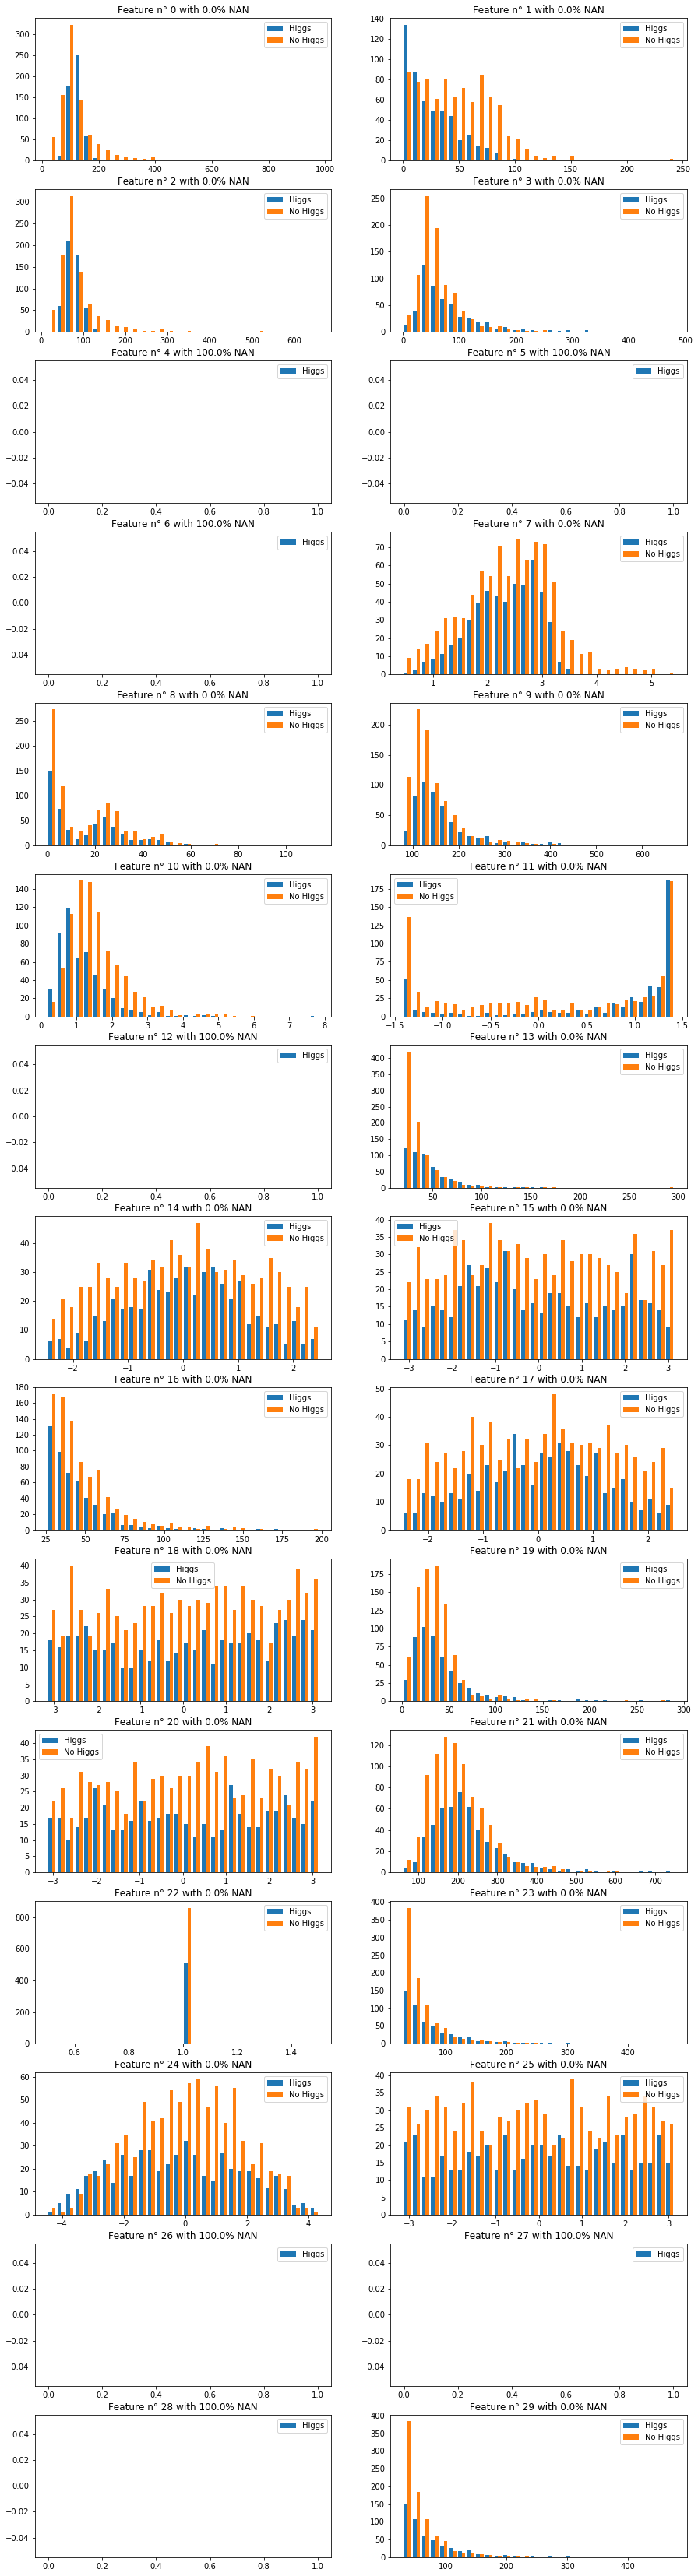

In [235]:
display_feature_distribution(y3, p3, 30)

In [237]:
p3_processed = process_features_p0(p3)
p3_processed.shape

/home/hadrien/ML/local/projects/project1/ML_methods.py:98: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(t, axis = 0)
/home/hadrien/ML/local/projects/project1/ML_methods.py:101: RuntimeWarning: Mean of empty slice
  column[np.isnan(column)] = np.nanmean(column)
/home/hadrien/ML/local/projects/project1/features_engineering.py:100: RuntimeWarning: All-NaN slice encountered
  feature = tx[:,i] - np.nanmin(tx[:,i]) + 0.1 #pour enlever les valeurs négatives
/home/hadrien/ML/local/projects/project1/features_engineering.py:54: RuntimeWarning: All-NaN slice encountered
  standfeature = (standfeature - np.nanmin(standfeature) - np.pi)/ (np.nanmax(standfeature) - np.nanmin(standfeature)) * 2 * np.pi
/home/hadrien/anaconda3/lib/python3.6/site-packages/numpy/lib/nanfunctions.py:1434: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)
/home/hadrien/ML/local/projects/project1/features_engineering.py:87: RuntimeWarning: Mean of empty slice
  mean.append(np.nanmean(stand

(1368, 34)

# Train Models 

In [239]:
from train_model import *

## P0

In [241]:
feature_nans = [22]
p0_processed = np.delete(p0_processed, feature_nans, axis = 1)

Ridge Resgression, Loss : 0.773, Lambda : 1e-10


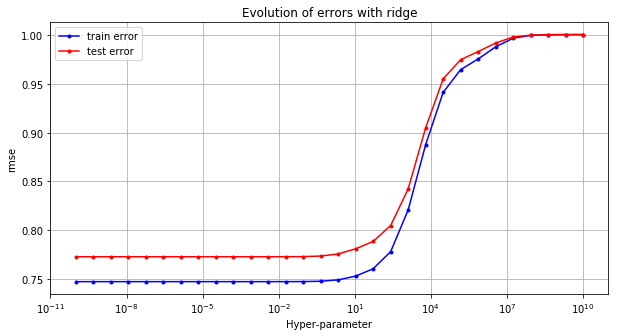

In [242]:
ridge_regression_exploration(y0, p0_processed, 0.8, np.logspace(-10, 10, 30))

## P1

In [243]:
feature_nans = [0, 22]
p1_processed = np.delete(p1_processed, feature_nans, axis = 1)

Ridge Resgression, Loss : 0.329, Lambda : 259.2943797404667


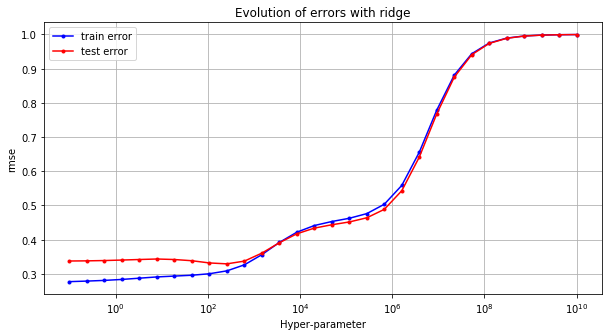

In [244]:
ridge_regression_exploration(y1, p1_processed, 0.8, np.logspace(-1, 10, 30))

## P2

In [253]:
feature_nans = [4,5,6,12,22, 23 ,24, 25, 26,27,28]
p2_processed = np.delete(p2_processed, feature_nans, axis = 1)

Ridge Resgression, Loss : 0.601, Lambda : 52.983169062837234


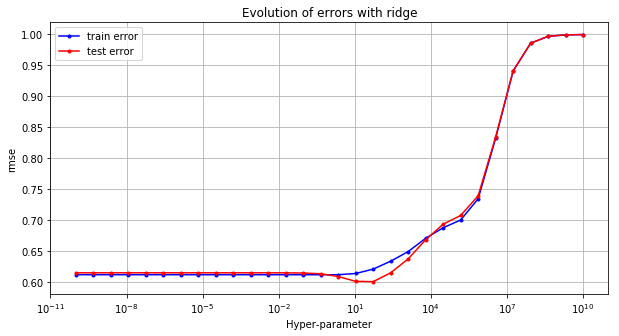

In [254]:
ridge_regression_exploration(y2, p2_processed, 0.8, np.logspace(-10, 10, 30))

## P3

In [247]:
feature_nans = [4,5,6,12,22, 26,27,28]
p3_processed = np.delete(p3_processed, feature_nans, axis = 1)

In [248]:
np.count_nonzero(np.isnan(p3[:,25]))

0

In [249]:
np.count_nonzero(np.isnan(p3_processed[:,21]))

0

Ridge Resgression, Loss : 0.791, Lambda : 8.531678524172815


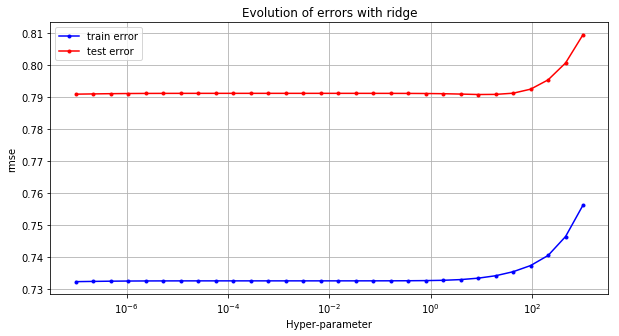

In [250]:
ridge_regression_exploration(y3, p3_processed, 0.8, np.logspace(-7, 3, 30))

# Test Models

# Create CSV